#Test for corresponding sources

In [84]:
%matplotlib inline
from IPython.display import Image
import glob
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw970'))
from uw.like2.analyze import sourceinfo, sourcecomparison
map(reload, (sourceinfo, sourcecomparison))
self = sourcecomparison.SourceComparison()

loading sources.pickle
loaded FITS catalog file /afs/slac/g/glast/groups/catalog//pointlike/fermi/catalog/3FGL-v13r3_v6r9p1_3lacv12p1_v7.fits with 3034 entries
generating closest distance to catalog "/afs/slac/g/glast/groups/catalog//pointlike/fermi/catalog/3FGL-v13r3_v6r9p1_3lacv12p1_v7.fits"


###Check for sources not in 3FGL
<pre>
From bruno.arsioli@asdc.asi.it

Also, here there are some cases showing TS>25 when running Binned  
analyses considering more than 6 years of data, and 3FGL for the  
background of known sources  ; to check if they are in your list of  
sources with TS>10
1WHSP name                 ra,dec(in degrees)

1WHSP J151618.7-152344     229.0780 -15.39561
1WHSP J020412.9-333340     31.05383 -33.56136
1WHSP J012657.2+330730     21.73846 +33.12508
1WHSP J162330.5+085724     245.8773 +8.95675
1WHSP J035856.1-305447     59.73375 -30.91328
1WHSP J223301.1+133601     338.2546 +13.60053
</pre>

In [111]:
info = """\
1WHSP J151618.7-152344     229.0780 -15.39561
1WHSP J020412.9-333340     31.05383 -33.56136
1WHSP J012657.2+330730     21.73846 +33.12508
1WHSP J162330.5+085724     245.8773 +8.95675
1WHSP J035856.1-305447     59.73375 -30.91328
1WHSP J223301.1+133601     338.2546 +13.60053\
""".split('\n')
nearest = []
for line in info:
    toks = line.split()
    ra,dec = map(float, toks[-2:])
    nearest.append((toks[1],ra,dec)+self.find_nearest_to(ra,dec))

t = pd.DataFrame(nearest, columns='1WHSP ra dec uw970 delta'.split())
ss = [self.df.ix[n] for n in t.uw970]
t['ts'] = [s.ts for s in ss]
#t['glon'] = [s.glon for s in ss]
#t['glat'] = [s.glat for s in ss]
t['locqual'] = [s.locqual for s in ss]
t['roiname']= [s.roiname for s in ss]

In [112]:
#Detected
t[t.delta<0.5]

,1WHSP,ra,dec,uw970,delta,ts,locqual,roiname
0,J151618.7-152344,229.07800,-15.39561,P86Y3445,0.080896,13.480826,2.62,HP12_0406
1,J020412.9-333340,31.05383,-33.56136,P86Y0452,0.010582,24.359554,2.07,HP12_1698
2,J012657.2+330730,21.73846,33.12508,P86Y0323,0.249726,10.224784,4.19,HP12_1241
4,J035856.1-305447,59.73375,-30.91328,P86Y0878,0.031164,43.402542,1.20,HP12_1533


In [108]:
#Not detected
t[t.delta>0.5]['1WHSP ra dec delta roiname'.split()]

,1WHSP,ra,dec,delta,roiname
3,J162330.5+085724,245.8773,8.95675,1.855545,HP12_0363
5,J223301.1+133601,338.2546,13.60053,1.867929,HP12_1378


## confusion test
<pre>
Hi again, those are the cases I've been trying to understand if the is  
source confusion and the possible counterparts
3FGL J0536.4-3347  : 5BZBJ0536-3343     1WHSP J053626.8-254748
3FGL J2145.7+0717  : 5BZQJ2148+0657     1WHSP J214552.2+071927
3FGL J0413.6-5334  : 5BZQJ0413-5332*    1WHSP J041458.1-533943new
</pre>

In [94]:
confusion="""\
3FGL J0536.4-3347  : 5BZBJ0536-3343     1WHSP J053626.8-254748
3FGL J2145.7+0717  : 5BZQJ2148+0657     1WHSP J214552.2+071927
3FGL J0413.6-5334  : 5BZQJ0413-5332*    1WHSP J041458.1-533943new\
""".split('\n')
cnames = [' '.join(line.split()[0:2])+' ' for line in confusion]
fglnames = list(self.cat.name3)
sources=[]
for name in cnames:
    i = fglnames.index(name)
    nick = self.cat.ix[i].name
    j=  list(self.df.close_name).index(nick)
    s = self.df.ix[j]
    sources.append(s)
    print name, s.name, nick, s.ts, s.locqual, s.roiname
    

3FGL J0536.4-3347  P86Y1252 P7R40795 863.96413954 0.17 HP12_1304
3FGL J2145.7+0717  P86Y4968 P7R43390 30.4037483153 1.11 HP12_1328
3FGL J0413.6-5334  P86Y0930 P7R40593 17.1042318391 0.89 HP12_1496


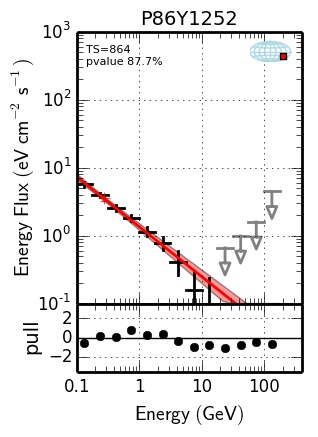

In [100]:
def get_sed(name):
    f = glob.glob('sedfig/'+name+'*')  
    return Image(f[0])
get_sed(sources[0].name)

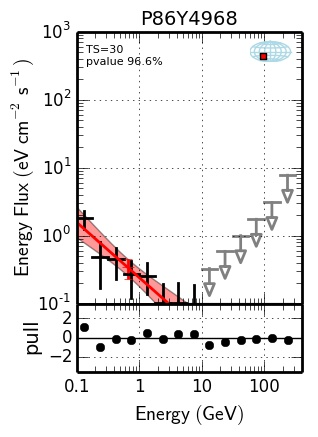

In [101]:
get_sed(sources[1].name)

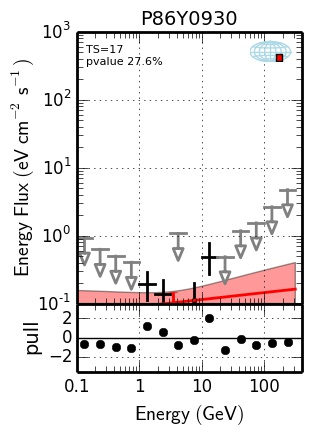

In [102]:
get_sed(sources[2].name)

##TS map puzzle
<pre>
About the 3FGL J2212.5+0703,
this is the case for which I tried to build the TS map considering  
different energy ranges. For both cases, I removed the 3FGL  
J2212.5+0703 from the source.xml file (attached). Also, in the .xml  
file I set as free parameters for the background: Isotropic_model  
"value" , and galactic_diff_model "normalization"
The parameters I used:
- Unbanned
- E range 3-300GeV
- time : MET 239557417 / 309457417
- cmap 0.05 deg/pixel
- gttsmap 22x22  0.05deg/pixel
- Unbinned
- Energy range 0.3-300GeV
- cmap 0.04 deg/pixel
- Time MET: 239557417 / 309557417
- gttsmap 20x20  0.04deg/pixel
</pre>

ROI, locqual: ('HP12_1377', 0.25)


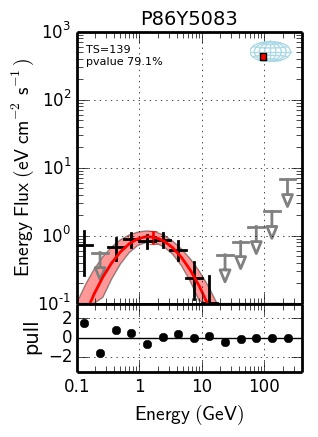

In [114]:
s1 = self.lookup_3fgl('3FGL J2212.5+0703')
print 'ROI, locqual:', (s1.roiname, s1.locqual)
f = glob.glob('sedfig/'+s1.name+'*')
Image(f[0])

###Load an ROI to check TS maps

In [116]:
from uw.like2 import main, process
r= main.ROI('.', 1377)

invoking Data.setPhotonBinner for front/back event types...
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
83 total sources: 0 extended, 3 global


TSplot: filling 225 pixels (size=0.41, npix=15)...


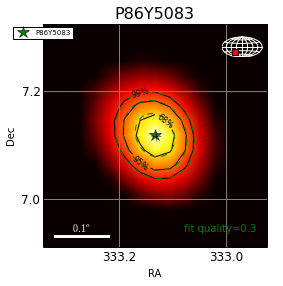

In [118]:
r.plot_tsmap('*5083');

In [ ]:
r2= main.ROI('.', 1304)

TSplot: filling 225 pixels (size=0.30, npix=15)...


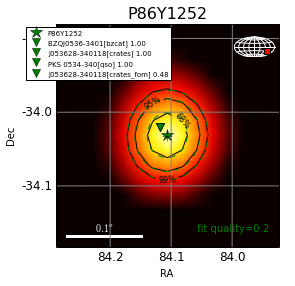

In [123]:
r2.plot_tsmap('*1252');